In [1]:
import pandas as pd

print(pd.__version__)

2.1.4


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Knicks_Per_Game_data.txt')
Knicks_All_Seasons_data = data.copy()
Knicks_All_Seasons_data

,Season,Lg,Tm,W,L,Finish,Unnamed: 6,Age,Ht.,Wt.,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2023-24,NBA,NYK,41,27,2,NaN,26.4,6-5,218.0,...,0.785,12.9,33.0,45.9,23.8,7.3,4.1,13.4,17.7,112.0
1,2022-23,NBA,NYK,47,35,3,NaN,24.5,6-6,218.0,...,0.761,12.6,34.0,46.6,22.9,6.4,4.1,13.0,20.3,116.0
2,2021-22,NBA,NYK,37,45,5,NaN,26.0,6-6,218.0,...,0.744,11.5,34.6,46.1,21.9,7.0,4.9,13.3,20.4,106.5
3,2020-21,NBA,NYK,41,31,3,NaN,25.6,6-6,217.0,...,0.784,9.7,35.5,45.1,21.4,7.0,5.1,12.9,20.5,107.0
4,2019-20,NBA,NYK,21,45,5,NaN,24.5,6-6,222.0,...,0.694,12.0,34.5,46.5,22.1,7.6,4.7,14.3,22.2,105.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1950-51,NBA,NYK,36,30,3,NaN,NaN,NaN,NaN,...,0.714,NaN,NaN,51.8,23.5,NaN,NaN,NaN,27.4,85.8
74,1949-50,NBA,NYK,40,28,2,NaN,NaN,NaN,NaN,...,0.711,NaN,NaN,NaN,19.2,NaN,NaN,NaN,25.3,80.7
75,1948-49,BAA,NYK,32,28,2,NaN,NaN,NaN,NaN,...,0.702,NaN,NaN,NaN,17.0,NaN,NaN,NaN,26.0,79.2
76,1947-48,BAA,NYK,26,22,2,NaN,NaN,NaN,NaN,...,0.672,NaN,NaN,NaN,7.8,NaN,NaN,NaN,22.4,74.5


In [4]:
Knicks_ASD_df = pd.DataFrame(Knicks_All_Seasons_data)

print("Column headers:")
print(Knicks_ASD_df.columns)

Column headers:
Index(['Season', 'Lg', 'Tm', 'W', 'L', 'Finish', 'Unnamed: 6', 'Age', 'Ht.',
       'Wt.', 'Unnamed: 10', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [5]:
# Define the columns you want to use
columns_to_use = ['Season', 'W', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']

# Load the CSV file with only the selected columns
All_Seasons_df = pd.read_csv('Knicks_Per_Game_data.txt', usecols=columns_to_use)

# Extract the starting year of each season
All_Seasons_df['Starting_Year'] = All_Seasons_df['Season'].str.split('-').str[0]

for col in columns_to_use[1:]:
    All_Seasons_df[col] = All_Seasons_df[col].astype(float)

# Filter the DataFrame to exclude rows before the 1979 season
All_Seasons_df = All_Seasons_df[All_Seasons_df['Starting_Year'].astype(int) >= 2000]

All_Seasons_df['3P%'] = All_Seasons_df['3P%'] * 100

# Take out the pulled first portion of 'Season'
All_Seasons_df.drop(columns=['Starting_Year'], inplace=True)

# Display the first few rows of the DataFrame to verify
print(All_Seasons_df.head())


    Season     W    FG   FGA    FG%    3P   3PA   3P%    2P   2PA  ...   FTA  \
0  2023-24  41.0  40.8  88.6  0.461  13.0  35.9  36.2  27.8  52.7  ...  22.1   
1  2022-23  47.0  42.0  89.4  0.470  12.6  35.7  35.4  29.4  53.6  ...  25.5   
2  2021-22  37.0  37.7  86.2  0.437  13.2  36.9  35.7  24.5  49.3  ...  24.1   
3  2020-21  41.0  39.4  86.5  0.456  11.8  30.0  39.2  27.7  56.4  ...  20.9   
4  2019-20  21.0  40.0  89.3  0.447   9.6  28.4  33.7  30.4  61.0  ...  23.5   

     FT%   ORB   DRB   TRB   AST  STL  BLK   TOV    PTS  
0  0.785  12.9  33.0  45.9  23.8  7.3  4.1  13.4  112.0  
1  0.761  12.6  34.0  46.6  22.9  6.4  4.1  13.0  116.0  
2  0.744  11.5  34.6  46.1  21.9  7.0  4.9  13.3  106.5  
3  0.784   9.7  35.5  45.1  21.4  7.0  5.1  12.9  107.0  
4  0.694  12.0  34.5  46.5  22.1  7.6  4.7  14.3  105.8  

[5 rows x 22 columns]


In [6]:
Knicks_Payroll = pd.read_csv('Knicks_Payroll_2000.csv')
Payroll_df = pd.DataFrame(Knicks_Payroll)

In [7]:
Payroll_df

,Season,Payroll
0,2023-24,163965182.0
1,2022-23,146569910.0
2,2021-22,119711411.0
3,2020-21,99121820.0
4,2019-20,110355759.0
5,2018-19,123388448.0
6,2017-18,104405157.0
7,2016-17,103595894.0
8,2015-16,75311181.0
9,2014-15,83022165.0


In [8]:
print(Payroll_df.columns)

Index([' Season', ' Payroll '], dtype='object')


In [9]:
print(Payroll_df.dtypes)

 Season       object
 Payroll     float64
dtype: object


In [10]:
All_Seasons_With_Payroll = All_Seasons_df.join(Payroll_df, on=None, how='left', lsuffix='', rsuffix='', sort=False, validate=None)
All_Seasons_With_Payroll

,Season,W,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,Season,Payroll
0,2023-24,41.0,40.8,88.6,0.461,13.0,35.9,36.2,27.8,52.7,...,12.9,33.0,45.9,23.8,7.3,4.1,13.4,112.0,2023-24,163965182.0
1,2022-23,47.0,42.0,89.4,0.470,12.6,35.7,35.4,29.4,53.6,...,12.6,34.0,46.6,22.9,6.4,4.1,13.0,116.0,2022-23,146569910.0
2,2021-22,37.0,37.7,86.2,0.437,13.2,36.9,35.7,24.5,49.3,...,11.5,34.6,46.1,21.9,7.0,4.9,13.3,106.5,2021-22,119711411.0
3,2020-21,41.0,39.4,86.5,0.456,11.8,30.0,39.2,27.7,56.4,...,9.7,35.5,45.1,21.4,7.0,5.1,12.9,107.0,2020-21,99121820.0
4,2019-20,21.0,40.0,89.3,0.447,9.6,28.4,33.7,30.4,61.0,...,12.0,34.5,46.5,22.1,7.6,4.7,14.3,105.8,2019-20,110355759.0
5,2018-19,17.0,38.2,88.3,0.433,10.0,29.5,34.0,28.2,58.8,...,10.5,34.3,44.7,20.1,6.8,5.1,14.0,104.6,2018-19,123388448.0
6,2017-18,29.0,40.7,87.7,0.464,8.2,23.3,35.2,32.5,64.4,...,10.5,33.6,44.0,23.3,6.7,5.1,14.7,104.5,2017-18,104405157.0
7,2016-17,31.0,39.6,88.5,0.447,8.6,24.7,34.8,31.0,63.8,...,12.0,33.2,45.2,21.8,7.1,5.5,13.9,104.3,2016-17,103595894.0
8,2015-16,32.0,36.9,84.0,0.439,7.4,21.5,34.6,29.4,62.5,...,10.4,34.0,44.4,20.5,5.7,5.7,13.4,98.4,2015-16,75311181.0
9,2014-15,17.0,35.1,82.0,0.428,6.8,19.7,34.7,28.3,62.3,...,10.6,29.8,40.4,21.3,7.0,4.7,14.7,91.9,2014-15,83022165.0


In [11]:
# drop "  Season       object" column
# check to see which season I needed to drop
print(All_Seasons_With_Payroll['Season'])

0     2023-24
1     2022-23
2     2021-22
3     2020-21
4     2019-20
5     2018-19
6     2017-18
7     2016-17
8     2015-16
9     2014-15
10    2013-14
11    2012-13
12    2011-12
13    2010-11
14    2009-10
15    2008-09
16    2007-08
17    2006-07
18    2005-06
19    2004-05
20    2003-04
21    2002-03
22    2001-02
23    2000-01
Name: Season, dtype: object


In [12]:
Full_df = All_Seasons_With_Payroll.drop(' Season', axis=1)

In [13]:
Full_df.head()

,Season,W,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,Payroll
0,2023-24,41.0,40.8,88.6,0.461,13.0,35.9,36.2,27.8,52.7,...,0.785,12.9,33.0,45.9,23.8,7.3,4.1,13.4,112.0,163965182.0
1,2022-23,47.0,42.0,89.4,0.470,12.6,35.7,35.4,29.4,53.6,...,0.761,12.6,34.0,46.6,22.9,6.4,4.1,13.0,116.0,146569910.0
2,2021-22,37.0,37.7,86.2,0.437,13.2,36.9,35.7,24.5,49.3,...,0.744,11.5,34.6,46.1,21.9,7.0,4.9,13.3,106.5,119711411.0
3,2020-21,41.0,39.4,86.5,0.456,11.8,30.0,39.2,27.7,56.4,...,0.784,9.7,35.5,45.1,21.4,7.0,5.1,12.9,107.0,99121820.0
4,2019-20,21.0,40.0,89.3,0.447,9.6,28.4,33.7,30.4,61.0,...,0.694,12.0,34.5,46.5,22.1,7.6,4.7,14.3,105.8,110355759.0


In [14]:
print(Full_df.columns)

Index(['Season', 'W', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PTS', ' Payroll '],
      dtype='object')


In [15]:
Full_df = Full_df.rename(columns={' Payroll ': 'Payroll'})
Full_df.head()

,Season,W,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,Payroll
0,2023-24,41.0,40.8,88.6,0.461,13.0,35.9,36.2,27.8,52.7,...,0.785,12.9,33.0,45.9,23.8,7.3,4.1,13.4,112.0,163965182.0
1,2022-23,47.0,42.0,89.4,0.470,12.6,35.7,35.4,29.4,53.6,...,0.761,12.6,34.0,46.6,22.9,6.4,4.1,13.0,116.0,146569910.0
2,2021-22,37.0,37.7,86.2,0.437,13.2,36.9,35.7,24.5,49.3,...,0.744,11.5,34.6,46.1,21.9,7.0,4.9,13.3,106.5,119711411.0
3,2020-21,41.0,39.4,86.5,0.456,11.8,30.0,39.2,27.7,56.4,...,0.784,9.7,35.5,45.1,21.4,7.0,5.1,12.9,107.0,99121820.0
4,2019-20,21.0,40.0,89.3,0.447,9.6,28.4,33.7,30.4,61.0,...,0.694,12.0,34.5,46.5,22.1,7.6,4.7,14.3,105.8,110355759.0


In [16]:
Payroll_df = Full_df.loc[:, ['Season','Payroll']]
Payroll_df

,Season,Payroll
0,2023-24,163965182.0
1,2022-23,146569910.0
2,2021-22,119711411.0
3,2020-21,99121820.0
4,2019-20,110355759.0
5,2018-19,123388448.0
6,2017-18,104405157.0
7,2016-17,103595894.0
8,2015-16,75311181.0
9,2014-15,83022165.0


In [17]:
W_Season_df = Full_df.loc[:, ['Season', 'W']]
W_Season_df

,Season,W
0,2023-24,41.0
1,2022-23,47.0
2,2021-22,37.0
3,2020-21,41.0
4,2019-20,21.0
5,2018-19,17.0
6,2017-18,29.0
7,2016-17,31.0
8,2015-16,32.0
9,2014-15,17.0


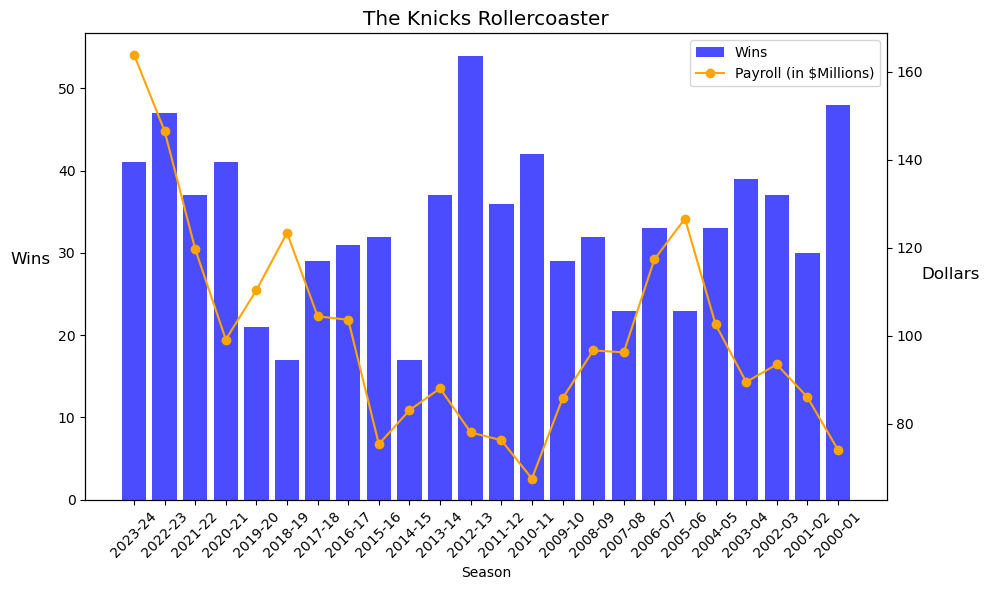

In [28]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Wins
ax1.bar(W_Season_df['Season'], W_Season_df['W'], color='blue', alpha=0.7, label='Wins')

# Set up a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Payroll
ax2.plot(Payroll_df['Season'], Payroll_df['Payroll']/1000000, color='orange', linestyle='-', marker='o', label='Payroll (in $Millions)')

# Set labels and title
ax1.set_xlabel('Season')
ax1.set_ylabel('Wins', rotation = 360, labelpad = 20, fontsize = 'large')
ax2.set_ylabel('Dollars', rotation = 360, labelpad = 20, fontsize = 'large')
ax1.set_title('The Knicks Rollercoaster', fontsize = 'x-large')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Rotate x-axis labels
ax1.tick_params(axis='x', rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [19]:
#Full_df

In [20]:
# Dollar_per_Point_df = Payroll_in_10Ms_df/Full_df['PTS']
# Dollar_per_Point_df

In [21]:
# W_Season_df = Full_df.loc[:, ['Season', 'W']]
# W_Season_df

In [22]:
# df1 = Payroll_in_Ms_df
# df2 = W_df
# 
# # Plotting
# plt.figure(figsize=(10, 6))
# 
# # Plot data from df1
# plt.bar(Full_df['Season'], df1, color='blue', label='DataFrame 1')
# 
# # Plot data from df2
# plt.bar(Full_df['Season'], df2, color='orange', label='DataFrame 2', alpha=0.5)
# 
# # Customize the plot
# plt.title('Bar Chart with Multiple Values from Different DataFrames')
# plt.xlabel('Category')
# plt.ylabel('Values')
# plt.legend()
# plt.xticks(rotation=45)
# 
# # Show plot
# plt.tight_layout()
# plt.show()

In [23]:
## Define the width of each bar
#bar_width = 0.35
#
## Calculate the position for each set of bars
#seasons = Full_df['Season']
#x = range(len(seasons))
#x1 = [i - bar_width / 2 for i in x]  # Position for the first set of bars
#x2 = [i + bar_width / 2 for i in x]  # Position for the second set of bars
#
## Plotting
#plt.figure(figsize=(10, 6))
#
## Plot data from df1 (Payroll_in_Ms_df)
#plt.bar(x1, Payroll_in_10Ms_df, width=bar_width, color='b', label='Payroll (in tens of millions)')
#
## Plot data from df2 (W_df)
#plt.bar(x2, W_df, width=bar_width, color='r', label='Wins', alpha=0.5)
#
## Customize the plot
#plt.title('Bar Chart with Payroll and Wins Over Seasons')
#plt.xlabel('Season')
#plt.ylabel('Values')
#plt.legend()
#plt.xticks(x, seasons, rotation=45)
#
## Show plot
#plt.tight_layout()
#plt.show()
